In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 数据准备

In [2]:
#load data
file_path='Live_20210128.csv'
df=pd.read_csv(file_path)
df=df.sample(frac=1.0).reset_index(drop=True)
print(df.shape)
print(df.columns)

(7050, 16)
Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')


# 数据清洗

In [3]:
data=df.iloc[:,3:df.shape[1]-4]
print(data.shape)
print(data.columns)

(7050, 9)
Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')


In [4]:
for column in data.columns:
    if data[column].count()!=data.shape[0]:
        print('Missing data:')
        row=data[column][data[column].isnull().values==True].index.tolist()
        print('Missing data at：{}, row:{}'.format(column,row))
        data.drop(index=row)

In [5]:
#normalization
means=[]
stds=[]
maxs=[]
mins=[]
for column in data.columns:
    means.append(data[column].mean())
    stds.append(data[column].std())
    maxs.append(data[column].max())
    mins.append(data[column].min())
print(means)
print(stds)
print(maxs)
print(mins)
data-=means
data/=np.array(maxs)-np.array(mins)
print(data)

[230.11716312056737, 224.3560283687943, 40.022553191489365, 215.0431205673759, 12.728652482269503, 1.2893617021276595, 0.6964539007092199, 0.24368794326241136, 0.11319148936170213]
[462.6253091352333, 889.6368195190057, 131.59996549017612, 449.47235705614156, 39.97293010859566, 8.719650380381506, 3.9571834429528265, 1.5971559395113408, 0.7268118906561141]
[4710, 20990, 3424, 4710, 657, 278, 157, 51, 31]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0         -0.046309     -0.010546   -0.011689  -0.043109  -0.019374 -0.004638   
1          0.107618     -0.009831   -0.011689   0.102326   0.027810  0.027736   
2         -0.043337     -0.010689   -0.011689  -0.040137  -0.019374 -0.004638   
3          0.315049     -0.008974   -0.009060   0.318250  -0.019374 -0.004638   
4         -0.044823     -0.010689   -0.011689  -0.041835  -0.017852 -0.004638   
...             ...           ...         ...        ...        ...       ...  

In [6]:
#convert to ndarray
X=data.values
print(X.shape)

(7050, 9)


# 模型搭建

In [7]:
def distance(v1,v2):
    return np.sqrt(np.sum(np.square(v1-v2)))

In [8]:
def kmeans(data,k):
    K=data[:k,:]
    #K=np.random.uniform(-1,1,(k,data.shape[1]))
    #print("初始化质心：{}".format(k))
    ret=np.zeros((data.shape[0],2))
    flag=True
    while flag:
        flag=False
        for i in range(data.shape[0]):
            #print("数据的每一行：{}".format(data[i]))
            minDist=np.inf
            minIndex=-1
            #print(K.shape[1])
            for j in range(K.shape[0]):
                #print("第{}个质心点{}".format(j,K[j]))
                #计算数据中的每个点到聚类中心的距离
                ds=distance(data[i],K[j])
                #print("距离：{}".format(ds))
                if ds<minDist:
                    minDist=ds
                    minIndex=j
                    #print("距离和簇中心:{}   {}".format(ds,str(j)))
            #每次计算完一行数据到质心的距离后，更新ret矩阵的结果（将数据点分给距离其最近的簇）
            ret[i][0]=minDist
            ret[i][1]=minIndex
        #print()
        #对每个簇，计算簇中所有点的均值并将均值作为质心
        for i in range(k):
            cluster=data[ret[:,1]==i]
            #print(cluster)
            if len(cluster)==0:
                pass
            else:
                center = np.mean(cluster, axis=0)
                #print(center)
                if (center == K[i]).all():
                    pass
                else:
                    flag = True
                    K[i] = center
    #质心不发生改变
    for i in range(len(K)):
        print("类{}质心点为：{}".format(i+1,K[i]))
    return K,ret
    #data_c=np.c_[data,ret]
    #print(data_c)
    #data_c=pd.DataFrame(data_c)
    #data_c.to_csv('./ret.csv')
    #center_x = K[:, 0]
    #center_y = K[:, 1]
    #print('center_x:',center_x)
    #print('center_y:',center_y)
    #plt.scatter(center_x, center_y, marker="X")
    #plt.scatter(X, Y)
    #plt.show()

# 模型训练测试

In [9]:
for num_class in range(2,5):
    print('分为{}类'.format(num_class))
    K,preds=kmeans(data.values,num_class)
    print()

分为2类
类1质心点为：[-0.02404341 -0.00135842 -0.00278974 -0.02313237 -0.00514175 -0.002485
 -0.00112364 -0.00036523 -0.00085788]
类2质心点为：[0.3068094  0.01738083 0.03565848 0.2951835  0.06562122 0.03167749
 0.01436126 0.00468106 0.0109656 ]

分为3类
类1质心点为：[0.17042924 0.15369089 0.16311647 0.12353413 0.2807022  0.08257224
 0.06353993 0.04010198 0.04706551]
类2质心点为：[ 0.33858264 -0.00777014 -0.00734803  0.34055542 -0.01465221  0.00412274
 -0.0031861  -0.00393485 -0.00347791]
类3质心点为：[-0.02411824 -0.00380952 -0.00409429 -0.02293177 -0.00693839 -0.00252735
 -0.00157639 -0.0008838  -0.00110347]

分为4类
类1质心点为：[0.18340794 0.15744466 0.17389536 0.13318664 0.2992078  0.09264267
 0.0667894  0.04183668 0.05051786]
类2质心点为：[ 0.43528422 -0.00755985 -0.00775883  0.43718088 -0.01402449  0.00397066
 -0.00307555 -0.00439746 -0.00365134]
类3质心点为：[-0.02772115 -0.00328788 -0.00373228 -0.02656734 -0.00662996 -0.00276519
 -0.00148752 -0.00084918 -0.00104437]
类4质心点为：[ 0.15675257 -0.00739398 -0.00672551  0.15757544 -0.00763525 

# 结果可视化

类1质心点为：[-0.02376174 -0.00092762]
类2质心点为：[0.31077573 0.01220678]


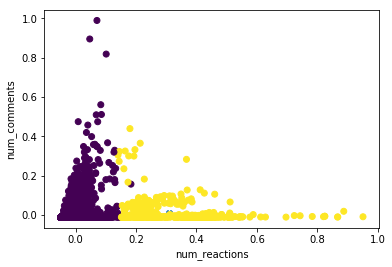

类1质心点为：[-0.02399688 -0.0027493 ]
类2质心点为：[0.30723062 0.03531101]


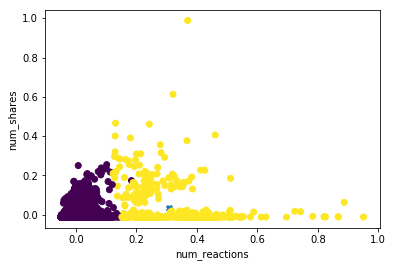

类1质心点为：[-0.02367561 -0.02288986]
类2质心点为：[0.31165985 0.30129815]


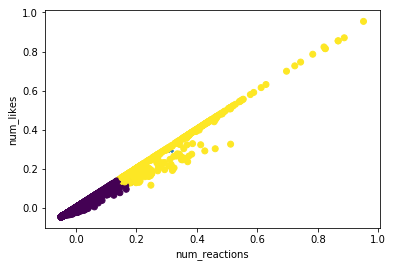

类1质心点为：[-0.02350509 -0.00532503]
类2质心点为：[0.31211339 0.07083487]


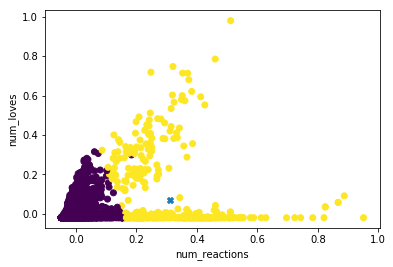

类1质心点为：[-0.02378667 -0.00246086]
类2质心点为：[0.31043379 0.03213581]


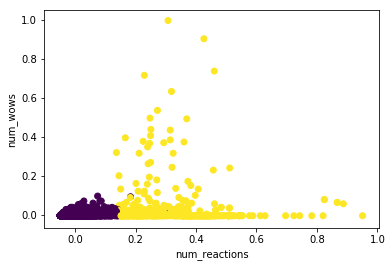

类1质心点为：[-0.02373665 -0.00103348]
类2质心点为：[0.31111691 0.01359304]


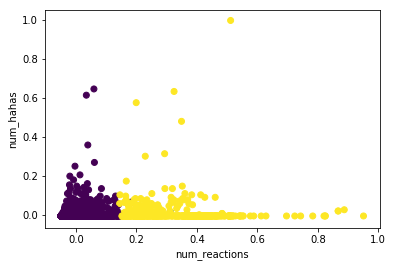

类1质心点为：[-0.02373665 -0.00030453]
类2质心点为：[0.31111691 0.0040313 ]


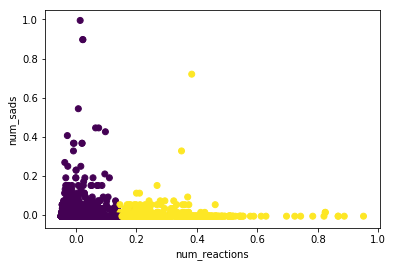

类1质心点为：[-0.02373665 -0.00073988]
类2质心点为：[0.31111691 0.00973388]


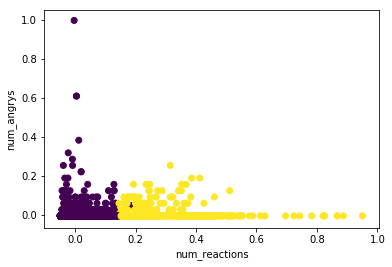

类1质心点为：[0.14474648 0.13384374]
类2质心点为：[-0.00672254 -0.00621521]


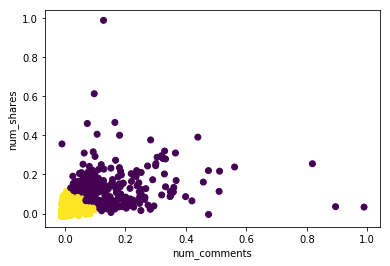

类1质心点为：[-0.00046117 -0.02255793]
类2质心点为：[0.00632907 0.30618322]


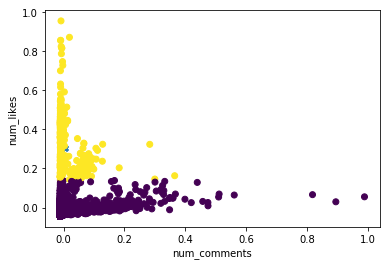

类1质心点为：[0.11585933 0.1943056 ]
类2质心点为：[-0.006635   -0.01113242]


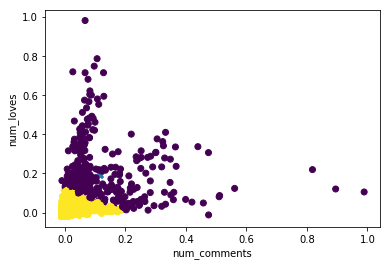

类1质心点为：[0.2029671  0.07624758]
类2质心点为：[-0.00534552 -0.00201136]


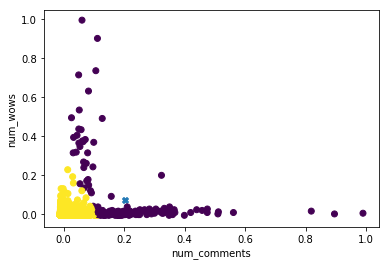

类1质心点为：[0.2225021  0.07191597]
类2质心点为：[-0.00506508 -0.00163635]


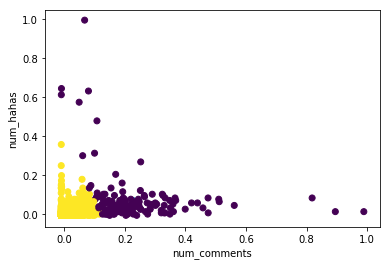

类1质心点为：[0.2165135  0.09137565]
类2质心点为：[-0.00489651 -0.00206578]


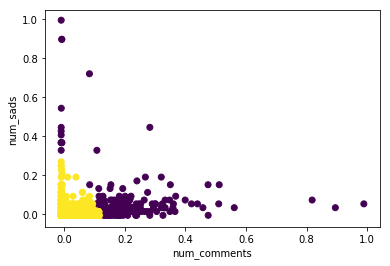

类1质心点为：[0.2344129  0.03350105]
类2质心点为：[-0.00491967 -0.00070201]


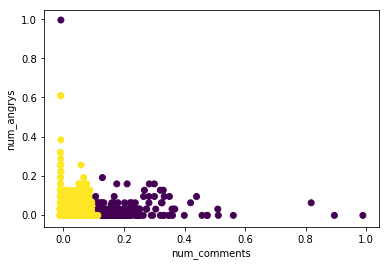

类1质心点为：[-0.00207355 -0.02272468]
类2质心点为：[0.02782039 0.30371857]


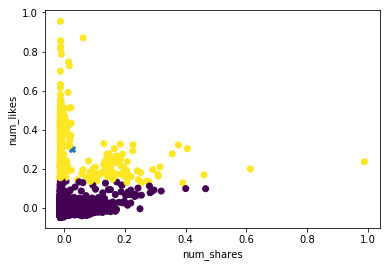

类1质心点为：[0.12033755 0.20582904]
类2质心点为：[-0.00647247 -0.01107692]


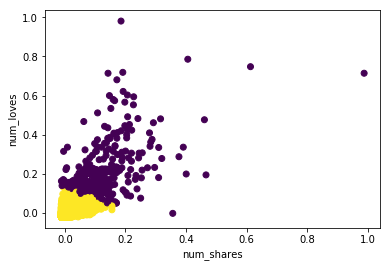

类1质心点为：[0.17259288 0.07118096]
类2质心点为：[-0.00519153 -0.00214477]


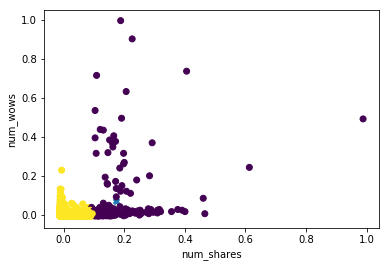

类1质心点为：[0.13493375 0.04845298]
类2质心点为：[-0.00674971 -0.00242335]


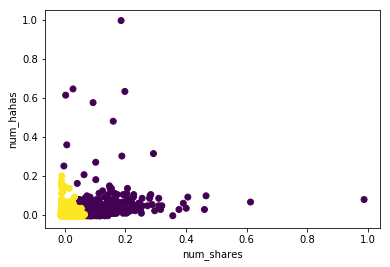

类1质心点为：[0.12584215 0.05187872]
类2质心点为：[-0.00680843 -0.00280629]


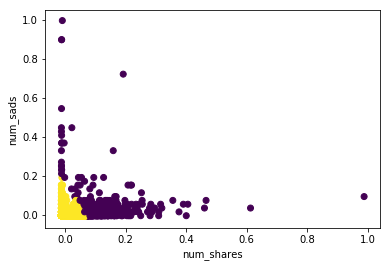

类1质心点为：[0.13497331 0.04081248]
类2质心点为：[-0.00668838 -0.00202217]


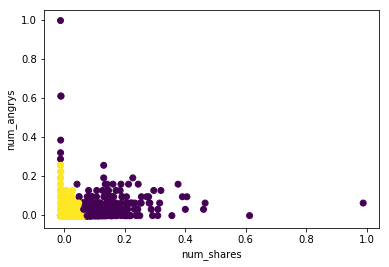

类1质心点为：[-0.02302795 -0.00493741]
类2质心点为：[0.29731729 0.06386682]


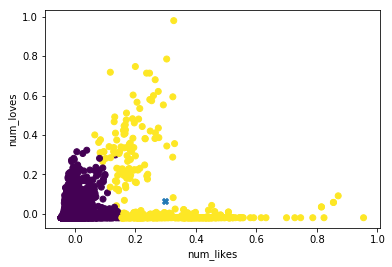

类1质心点为：[-0.02267632 -0.00228971]
类2质心点为：[0.30440647 0.03075668]


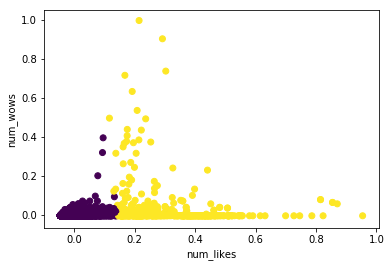

类1质心点为：[-0.02258239 -0.0008957 ]
类2质心点为：[0.30583573 0.01217779]


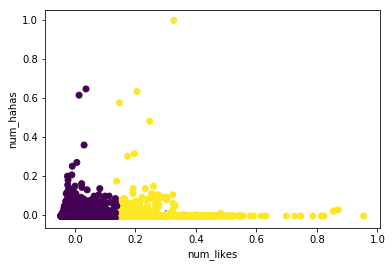

类1质心点为：[-0.02253299 -0.00023249]
类2质心点为：[0.30652555 0.00320296]


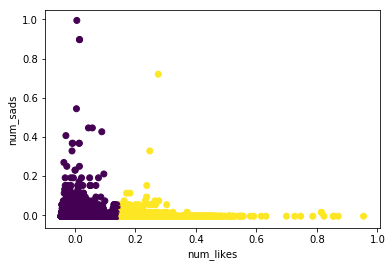

类1质心点为：[-0.02255793 -0.00059466]
类2质心点为：[0.30618322 0.00810688]


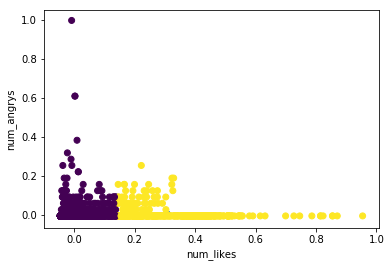

类1质心点为：[0.2837743  0.07532457]
类2质心点为：[-0.00811496 -0.00215628]


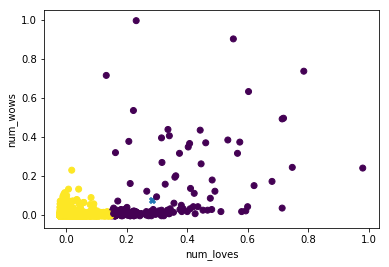

类1质心点为：[0.23586923 0.04394928]
类2质心点为：[-0.00993741 -0.0018499 ]


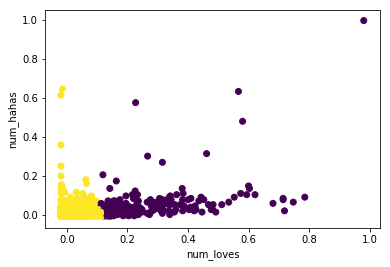

类1质心点为：[0.23337341 0.02372393]
类2质心点为：[-0.01004819 -0.00101915]


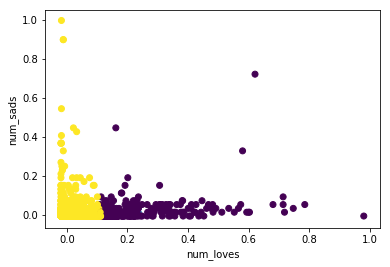

类1质心点为：[0.23887797 0.03920414]
类2质心点为：[-0.00977007 -0.0016021 ]


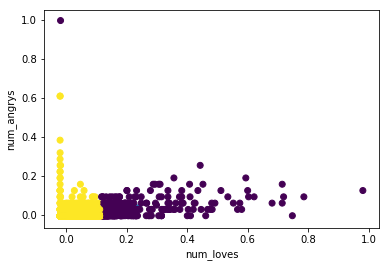

类1质心点为：[0.38095031 0.19116703]
类2质心点为：[-0.00168458 -0.00084245]


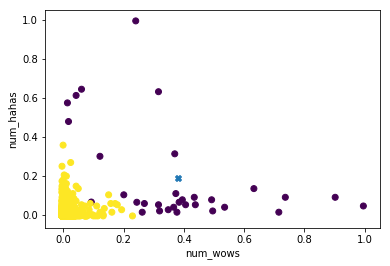

类1质心点为：[0.28647198 0.20390528]
类2质心点为：[-0.00171896 -0.00121992]


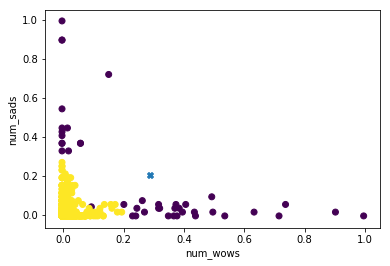

类1质心点为：[0.4455557  0.05342062]
类2质心点为：[-0.00165133 -0.00019613]


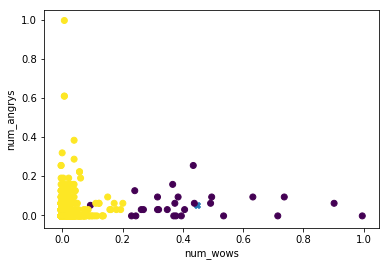

类1质心点为：[0.1238892  0.31990462]
类2质心点为：[-0.00059845 -0.00154826]


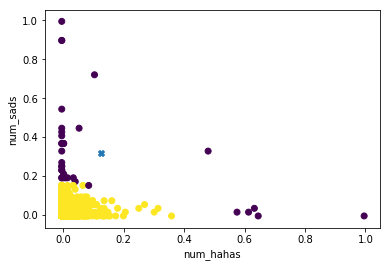

类1质心点为：[0.1001245  0.10499382]
类2质心点为：[-0.0018057  -0.00189405]


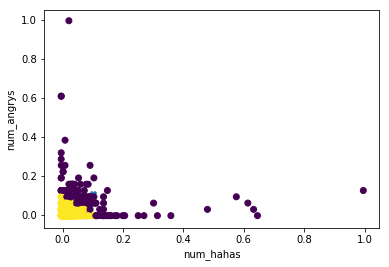

类1质心点为：[0.34436792 0.10144752]
类2质心点为：[-0.0015189  -0.00044651]


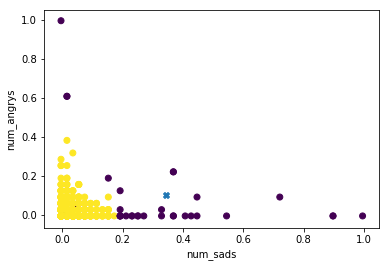

In [10]:
#reduce to 2 dim, use only 2 columns
num_class=2
for i in range(data.shape[1]-1):
    for j in range(i+1,data.shape[1]):
        #use column i and column j
        X_i=data.iloc[:,i]
        X_j=data.iloc[:,j]
        data_ij=np.c_[X_i,X_j]
        K_ij,preds_ij=kmeans(data_ij,num_class)
        plt.scatter(K_ij[:,0], K_ij[:,1], marker="X")
        plt.scatter(X_i,X_j,c=preds_ij[:,1])
        plt.xlabel(data.columns[i])
        plt.ylabel(data.columns[j])
        plt.show()

类1质心点为：[0.13489598 0.06493083]
类2质心点为：[0.41064636 0.00270943]
类3质心点为：[-0.02794577 -0.0053602 ]


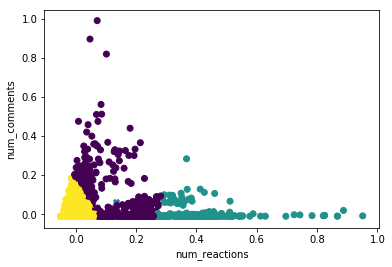

类1质心点为：[0.18030948 0.05057015]
类2质心点为：[0.43274229 0.00467164]
类3质心点为：[-0.02637692 -0.00340096]


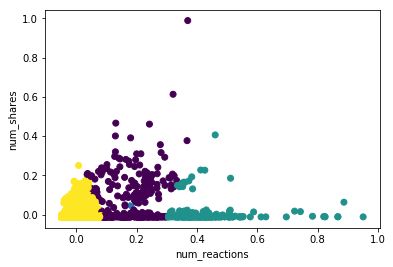

类1质心点为：[0.17351591 0.16211819]
类2质心点为：[0.43147797 0.42619826]
类3质心点为：[-0.02686137 -0.02590066]


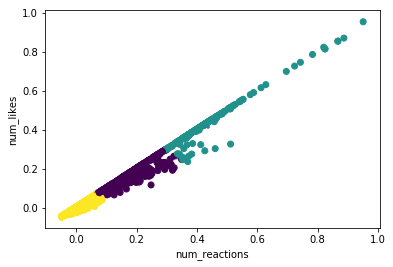

类1质心点为：[0.18251847 0.30702141]
类2质心点为：[ 0.34162361 -0.01456166]
类3质心点为：[-0.02371827 -0.00685792]


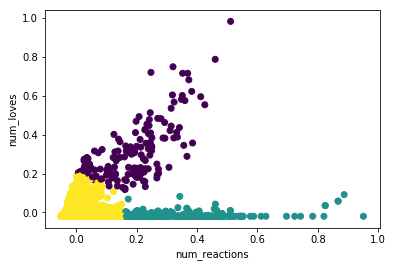

类1质心点为：[0.17659095 0.02951567]
类2质心点为：[0.4314519 0.0218807]
类3质心点为：[-0.02663308 -0.00269901]


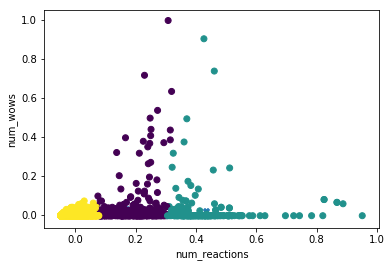

类1质心点为：[0.17022962 0.01494556]
类2质心点为：[0.42771721 0.01375839]
类3质心点为：[-0.02689055 -0.00149912]


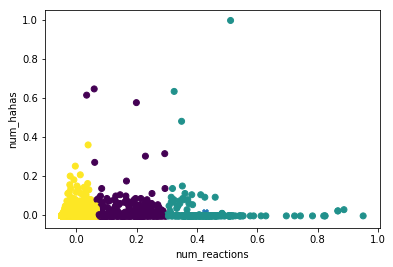

类1质心点为：[0.16860736 0.01623245]
类2质心点为：[0.42771721 0.0034912 ]
类3质心点为：[-0.02696506 -0.00123213]


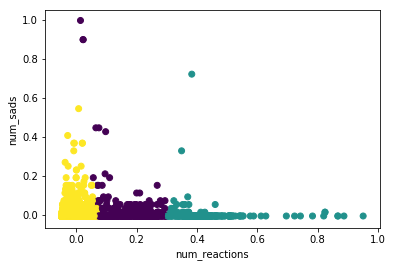

类1质心点为：[0.17153822 0.01092596]
类2质心点为：[0.42771721 0.00630659]
类3质心点为：[-0.02682337 -0.00095139]


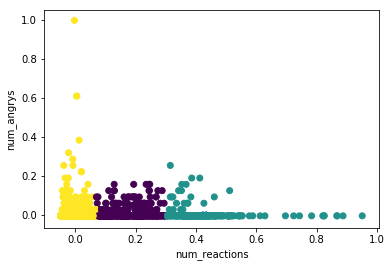

类1质心点为：[0.26688628 0.16421354]
类2质心点为：[-0.00857514 -0.00934777]
类3质心点为：[0.04912935 0.07880885]


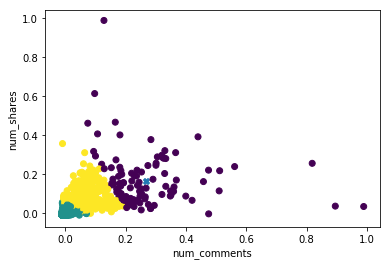

类1质心点为：[0.06342615 0.13880906]
类2质心点为：[-0.0056655   0.42126179]
类3质心点为：[-0.00478709 -0.02637198]


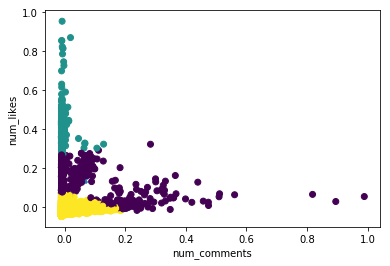

类1质心点为：[0.16970076 0.39691225]
类2质心点为：[-0.00872907 -0.01498353]
类3质心点为：[0.06729844 0.10004928]


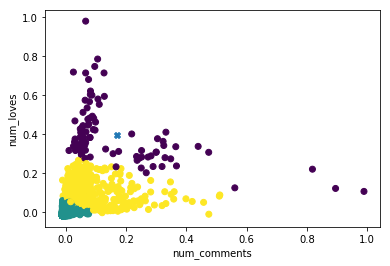

类1质心点为：[0.06439833 0.4455557 ]
类2质心点为：[0.24227707 0.00919911]
类3质心点为：[-0.00506009 -0.00186711]


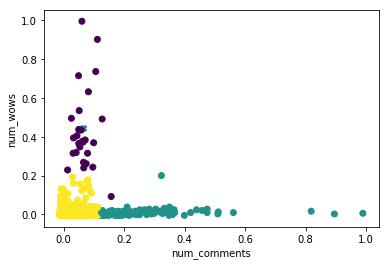

类1质心点为：[0.27933861 0.06887739]
类2质心点为：[-0.00829821 -0.00315993]
类3质心点为：[0.06254699 0.03241142]


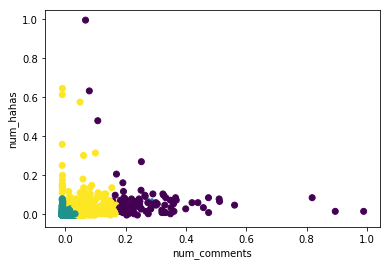

类1质心点为：[0.26863386 0.08741638]
类2质心点为：[-0.00810965 -0.00394189]
类3质心点为：[0.05585435 0.03726385]


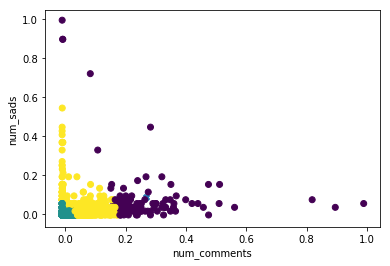

类1质心点为：[0.2856158  0.02656937]
类2质心点为：[-0.00787491 -0.0029781 ]
类3质心点为：[0.06393161 0.04427493]


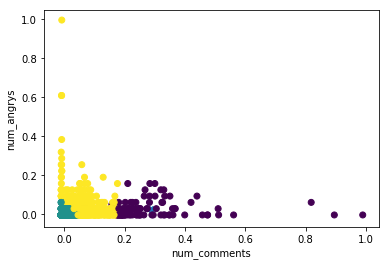

类1质心点为：[0.05254927 0.16678274]
类2质心点为：[-0.00717436  0.4333392 ]
类3质心点为：[-0.00329331 -0.02559822]


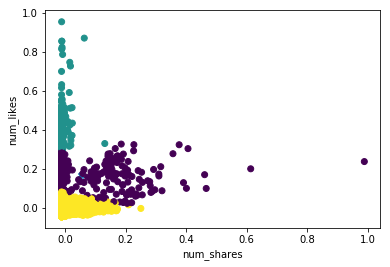

类1质心点为：[0.21029975 0.39664166]
类2质心点为：[-0.00964481 -0.01550766]
类3质心点为：[0.06498267 0.09627515]


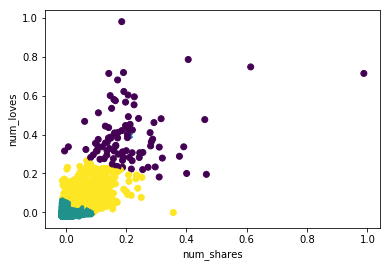

类1质心点为：[0.22992017 0.44444889]
类2质心点为：[0.10663112 0.00769845]
类3质心点为：[-0.00815404 -0.00228253]


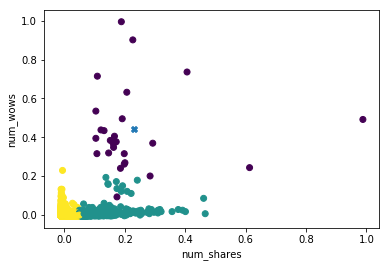

类1质心点为：[0.22368638 0.11165193]
类2质心点为：[-0.00985849 -0.00320089]
类3质心点为：[0.06734749 0.01600995]


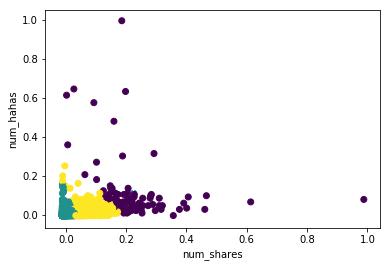

类1质心点为：[0.00973348 0.45698651]
类2质心点为：[-0.00729687 -0.00265307]
类3质心点为：[0.12651944 0.02227242]


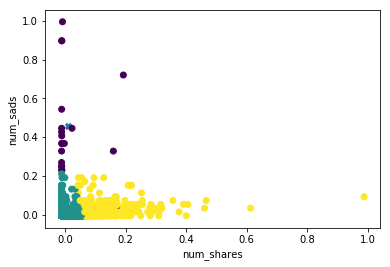

类1质心点为：[0.20760698 0.07329208]
类2质心点为：[-0.01003912 -0.00299994]
类3质心点为：[0.05983492 0.01571369]


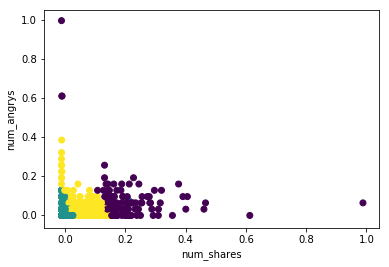

类1质心点为：[0.12304574 0.2978081 ]
类2质心点为：[ 0.34160213 -0.01465507]
类3质心点为：[-0.02272243 -0.00717915]


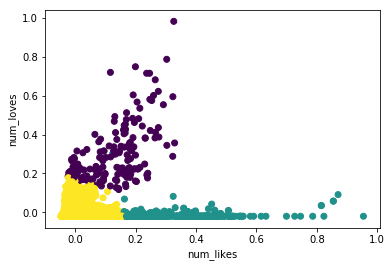

类1质心点为：[0.17190333 0.03801177]
类2质心点为：[0.43753954 0.00411035]
类3质心点为：[-0.02552473 -0.00266389]


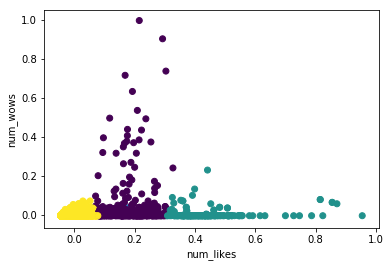

类1质心点为：[0.16089947 0.02065603]
类2质心点为：[ 0.43175404 -0.00138461]
类3质心点为：[-0.02606494 -0.00142459]


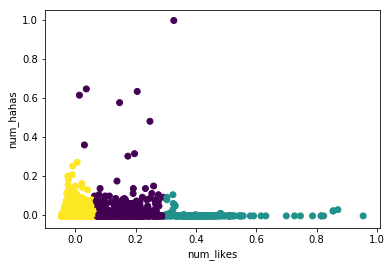

类1质心点为：[0.15780356 0.01741555]
类2质心点为：[ 0.43063552 -0.00387461]
类3质心点为：[-0.02620932 -0.00113445]


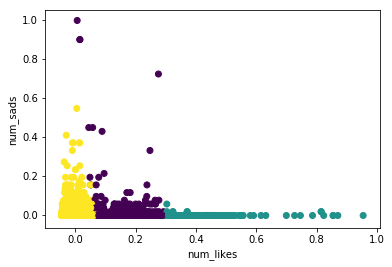

类1质心点为：[0.16086842 0.01458236]
类2质心点为：[4.31266893e-01 8.22339155e-05]
类3质心点为：[-0.02605939 -0.0010365 ]


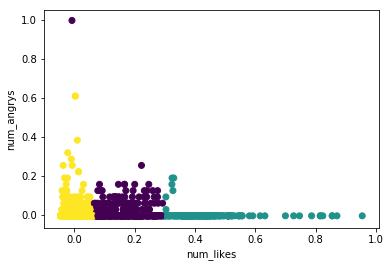

类1质心点为：[0.46126814 0.24454448]
类2质心点为：[-0.01451054 -0.0023709 ]
类3质心点为：[0.12140127 0.0031986 ]


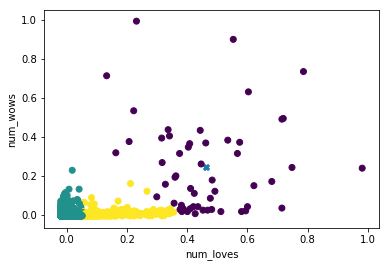

类1质心点为：[0.42048507 0.09771669]
类2质心点为：[-0.01526567 -0.00307684]
类3质心点为：[0.10352584 0.01922186]


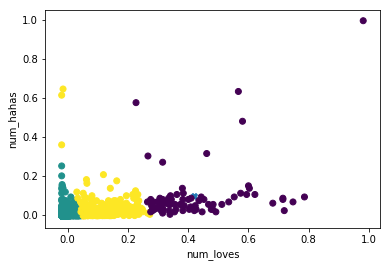

类1质心点为：[0.41911545 0.04130024]
类2质心点为：[-0.01540374 -0.00286517]
类3质心点为：[0.09974648 0.02314998]


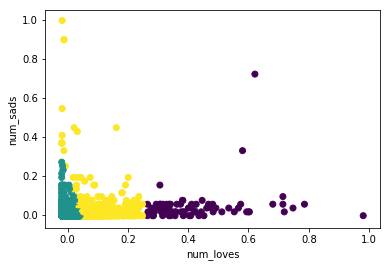

类1质心点为：[0.42106307 0.06739807]
类2质心点为：[-0.01525441 -0.00258967]
类3质心点为：[0.10333558 0.01808096]


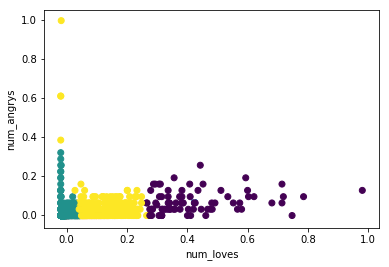

类1质心点为：[0.46955657 0.06867393]
类2质心点为：[0.10102748 0.57518182]
类3质心点为：[-0.00165571 -0.00087867]


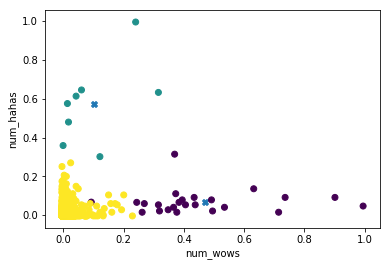

类1质心点为：[0.4455557  0.02312527]
类2质心点为：[0.01118935 0.45698651]
类3质心点为：[-0.00168786 -0.00138878]


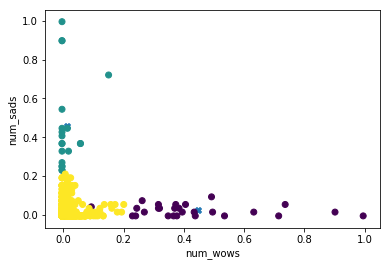

类1质心点为：[0.4455557  0.05342062]
类2质心点为：[0.00917318 0.05624512]
类3质心点为：[-0.00231379 -0.00365107]


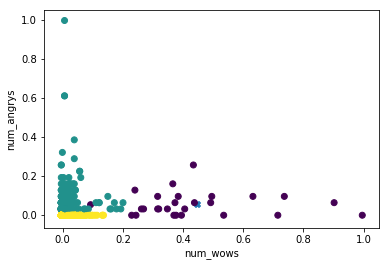

类1质心点为：[0.03972535 0.52724795]
类2质心点为：[-0.00223776 -0.00322269]
类3质心点为：[0.06993463 0.06711723]


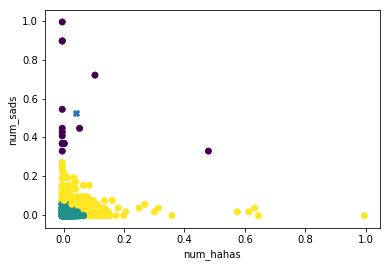

类1质心点为：[0.54616554 0.04294364]
类2质心点为：[-0.00204508 -0.002479  ]
类3质心点为：[0.04927375 0.08980986]


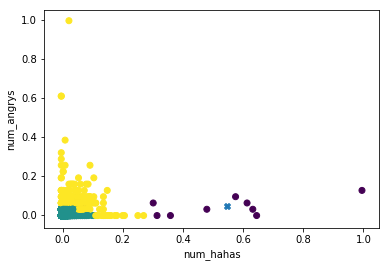

类1质心点为：[0.52724795 0.04150995]
类2质心点为：[-0.00326845 -0.00260265]
类3质心点为：[0.05411989 0.06466707]


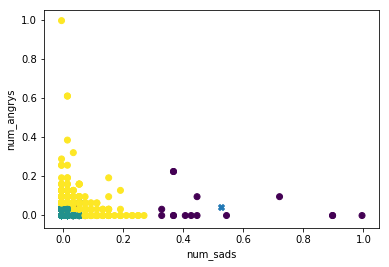

In [12]:
#reduce to 2 dim, use only 2 columns
num_class=3
for i in range(data.shape[1]-1):
    for j in range(i+1,data.shape[1]):
        #use column i and column j
        X_i=data.iloc[:,i]
        X_j=data.iloc[:,j]
        data_ij=np.c_[X_i,X_j]
        K_ij,preds_ij=kmeans(data_ij,num_class)
        plt.scatter(K_ij[:,0], K_ij[:,1], marker="X")
        plt.scatter(X_i,X_j,c=preds_ij[:,1])
        plt.xlabel(data.columns[i])
        plt.ylabel(data.columns[j])
        plt.show()

# 模型优化

In [11]:
#PCA
